# Second Data Preparation Process

Data with FaceBoxConfidence value above 70 will be selected in this notebook file.

The images in the selected data will be read with the opencv library and the related faces will be resized as (224, 224) and added to the DataFrame.

Selected DataFrame will be splitted as Training Validation and Test data.

Face samples will be drawn.

All dataframes will be saved as pkl files for future use.

See http://mmlab.ie.cuhk.edu.hk/projects/socialrelation/index.html for dataset.

Images must be moved to /Data/RawData/Images/ path.

label.lst must be moved to /Data/RawData/Label/ path.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, labelDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(labelDf.iloc[imgDf.iloc[i].Label].Name)
        
    plt.show()
    
    return

In [4]:
#Function to Read Images BGR Format
def ReadImage(row : dict):
    img = cv2.imread('../Data/RawData/Image/' + row['ImageName'])
    if img is not None:
        return cv2.resize(img[row['FaceBoxTop'] : row['FaceBoxBottom'], row['FaceBoxLeft'] : row['FaceBoxRight']], (224, 224))
    return None

In [5]:
#The data headers in the label.lst file are being defined according to the readme.txt file
dataHeader = ['ImageName', 'FaceID', 'FaceBoxTop', 'FaceBoxLeft', 'FaceBoxRight', 'FaceBoxBottom',
             'FaceBoxConfidence', 'Label']
dataHeader

['ImageName',
 'FaceID',
 'FaceBoxTop',
 'FaceBoxLeft',
 'FaceBoxRight',
 'FaceBoxBottom',
 'FaceBoxConfidence',
 'Label']

In [6]:
#The labels in the label.lst file are being defined in order according to the readme.txt file
labelDf = pd.read_json('../Data/RawData/Label/Label.json')
labelDf

,Name
0,Angry
1,Disgust
2,Fear
3,Happy
4,Sad
5,Surprise
6,Neutral


In [7]:
#label.lst file is being read as DataFrame
imageListDf = pd.read_csv('../Data/RawData/Label/label.lst', sep = ' ', header = None, names = dataHeader)
imageListDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [8]:
#sampleDf is being generated with rows with FaceBoxConfidence greater than 70
sampleDf = imageListDf[imageListDf['FaceBoxConfidence'] > 70.0].copy()
sampleDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
5,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
9,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
12,angry_actor_161.jpg,0,95,127,510,478,81.7953,6
...,...,...,...,...,...,...,...,...
91783,afraid_woman_204.jpg,0,20,13,93,100,74.5950,6
91787,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5


In [9]:
#imageListDf is being cleaned
del imageListDf

In [10]:
#The face boxes in sampleDf are being read from raw images
sampleDf['ImageBGR'] = sampleDf.apply(lambda row: ReadImage(row), axis=1)
sampleDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label,ImageBGR
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3,"[[[14, 15, 13], [15, 16, 14], [15, 16, 14], [1..."
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0,"[[[77, 71, 81], [70, 63, 74], [64, 58, 69], [6..."
5,angry_actor_137.jpg,0,93,468,842,467,88.9519,0,"[[[48, 43, 44], [48, 43, 44], [48, 43, 44], [4..."
9,angry_actor_150.jpg,0,56,263,376,169,81.8792,0,"[[[131, 139, 152], [131, 139, 154], [131, 140,..."
12,angry_actor_161.jpg,0,95,127,510,478,81.7953,6,"[[[24, 22, 22], [25, 23, 23], [24, 22, 22], [2..."
...,...,...,...,...,...,...,...,...,...
91783,afraid_woman_204.jpg,0,20,13,93,100,74.5950,6,"[[[24, 30, 59], [24, 30, 59], [25, 31, 59], [2..."
91787,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4,"[[[83, 92, 112], [154, 163, 183], [199, 208, 2..."
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [11]:
#Unnecessary fields are being removed from sampleDf
sampleDf.drop(['ImageName', 'FaceID','FaceBoxTop', 'FaceBoxLeft',
               'FaceBoxRight', 'FaceBoxBottom', 'FaceBoxConfidence'], axis = 1, inplace = True)
sampleDf

,Label,ImageBGR
3,3,"[[[14, 15, 13], [15, 16, 14], [15, 16, 14], [1..."
4,0,"[[[77, 71, 81], [70, 63, 74], [64, 58, 69], [6..."
5,0,"[[[48, 43, 44], [48, 43, 44], [48, 43, 44], [4..."
9,0,"[[[131, 139, 152], [131, 139, 154], [131, 140,..."
12,6,"[[[24, 22, 22], [25, 23, 23], [24, 22, 22], [2..."
...,...,...
91783,6,"[[[24, 30, 59], [24, 30, 59], [25, 31, 59], [2..."
91787,4,"[[[83, 92, 112], [154, 163, 183], [199, 208, 2..."
91789,5,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
91790,5,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [12]:
#sampleDf is being checked for null
sampleDf.isnull().any()

Label       False
ImageBGR    False
dtype: bool

In [13]:
#Training data is being splitted from sampleDf
trainingDf = sampleDf.sample(frac=0.75)
testDf = sampleDf.drop(trainingDf.index)
trainingDf.reset_index(drop = True, inplace = True)
trainingDf

,Label,ImageBGR
0,3,"[[[165, 186, 207], [165, 186, 207], [160, 181,..."
1,5,"[[[215, 210, 212], [136, 131, 138], [115, 111,..."
2,1,"[[[0, 2, 0], [0, 2, 0], [0, 2, 0], [0, 2, 0], ..."
3,0,"[[[27, 31, 36], [27, 31, 36], [26, 30, 34], [2..."
4,6,"[[[160, 186, 200], [160, 186, 200], [163, 188,..."
...,...,...
16295,6,"[[[211, 234, 249], [211, 234, 249], [208, 232,..."
16296,5,"[[[210, 72, 53], [210, 72, 53], [210, 72, 53],..."
16297,3,"[[[196, 196, 196], [196, 196, 196], [196, 196,..."
16298,6,"[[[204, 221, 224], [201, 218, 221], [197, 214,..."


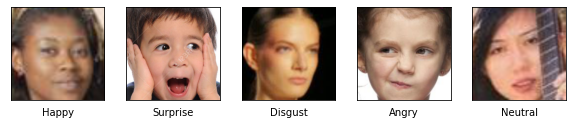

In [14]:
#First 5 images of trainingDf are being drawn
DrawImage(trainingDf.head(), labelDf)

In [15]:
#Validation and Test Data is being generated
validationDf = testDf.sample(frac=0.5)
testDf = testDf.drop(validationDf.index)
validationDf.reset_index(drop = True, inplace = True)
validationDf

,Label,ImageBGR
0,4,"[[[7, 4, 13], [7, 4, 13], [7, 4, 13], [6, 4, 1..."
1,3,"[[[36, 44, 51], [36, 44, 51], [37, 44, 52], [3..."
2,3,"[[[37, 39, 80], [39, 41, 82], [43, 45, 86], [4..."
3,6,"[[[247, 247, 247], [248, 248, 248], [247, 247,..."
4,3,"[[[83, 193, 199], [76, 193, 198], [76, 193, 19..."
...,...,...
2712,0,"[[[115, 105, 88], [115, 105, 88], [115, 105, 8..."
2713,6,"[[[134, 136, 156], [120, 124, 148], [106, 115,..."
2714,4,"[[[168, 151, 142], [167, 150, 141], [166, 149,..."
2715,5,"[[[231, 238, 235], [231, 238, 235], [230, 237,..."


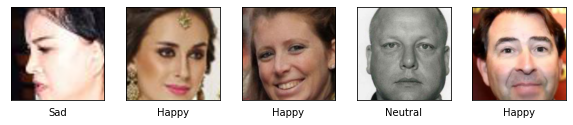

In [16]:
#First 5 images of validationDf are being drawn
DrawImage(validationDf.head(), labelDf)

In [17]:
#indexes of testDf are being resetted
testDf.reset_index(drop = True, inplace = True)
testDf

,Label,ImageBGR
0,0,"[[[62, 121, 130], [61, 120, 129], [60, 114, 12..."
1,0,"[[[65, 77, 105], [65, 77, 105], [65, 77, 105],..."
2,6,"[[[181, 183, 193], [180, 182, 192], [179, 181,..."
3,6,"[[[6, 11, 10], [5, 10, 9], [5, 10, 9], [4, 9, ..."
4,4,"[[[17, 19, 13], [16, 18, 12], [16, 18, 12], [1..."
...,...,...
2712,3,"[[[192, 194, 194], [192, 194, 194], [192, 194,..."
2713,3,"[[[249, 249, 249], [249, 249, 249], [250, 250,..."
2714,6,"[[[233, 221, 217], [233, 221, 217], [234, 222,..."
2715,6,"[[[24, 30, 59], [24, 30, 59], [25, 31, 59], [2..."


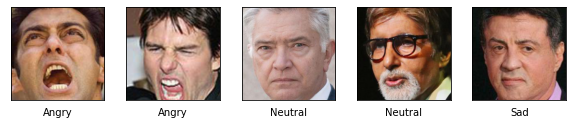

In [18]:
#First 5 images of testDf are being drawn
DrawImage(testDf.head(), labelDf)

In [19]:
#The selected data is being saved as pkl files with the name Sample1 for future use
trainingDf.to_pickle("../Data/Sample1/Training.pkl")
validationDf.to_pickle("../Data/Sample1/Validation.pkl")
testDf.to_pickle("../Data/Sample1/Test.pkl")